# Preprocessing Structured Data - Part 1
- Imputing Missing Class Labels
- Imputing Missing Class Labels Using k-Nearest Neighbors
- Normalizing Observations
- One-Hot Encode Features With Multiple Labels
- One-Hot Encode Nominal Categorical Features
- Preprocessing Categorical Features
- Preprocessing Iris Data
- Rescale A Feature
- Standardize A Feature

# 1) Imputing Missing Class Labels.

In [1]:
# Load libraries
import numpy as np
from sklearn.preprocessing import Imputer

In [2]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45], 
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27],
              [0, -0.21, -1.19],
              [np.nan, 0.87, 1.31],
              [np.nan, -0.67, -0.22]])
X

array([[ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 0.  , -0.21, -1.19],
       [  nan,  0.87,  1.31],
       [  nan, -0.67, -0.22]])

In [3]:
# Fill the Missing class with the Most Frequent class
# Create a Imputer object
imputer = Imputer(strategy='most_frequent',axis= 0)
# Fill missing values with most frequent class
imputer.fit_transform(X)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 0.  , -0.21, -1.19],
       [ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22]])

# 2) Imputing Missing Class Labels Using k-Nearest Neighbors

In [4]:
# Load libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45], 
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])

In [6]:
# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31], 
                       [np.nan, -0.67, -0.22]])

In [7]:
X_with_nan 

array([[  nan,  0.87,  1.31],
       [  nan, -0.67, -0.22]])

In [8]:
# Train KNN Learner
clf =KNeighborsClassifier(3,weights='distance')
trained_model = clf.fit(X[:,1:],X[:,0])


In [9]:
# Predict missing valeus of class
imputed_values = trained_model.predict(X_with_nan[:,1:])
# Join column of pratical class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1),X_with_nan[:,1:]))
# Join two feature matrices
np.vstack((X_with_imputed,X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

# 3) Normalizing Observations

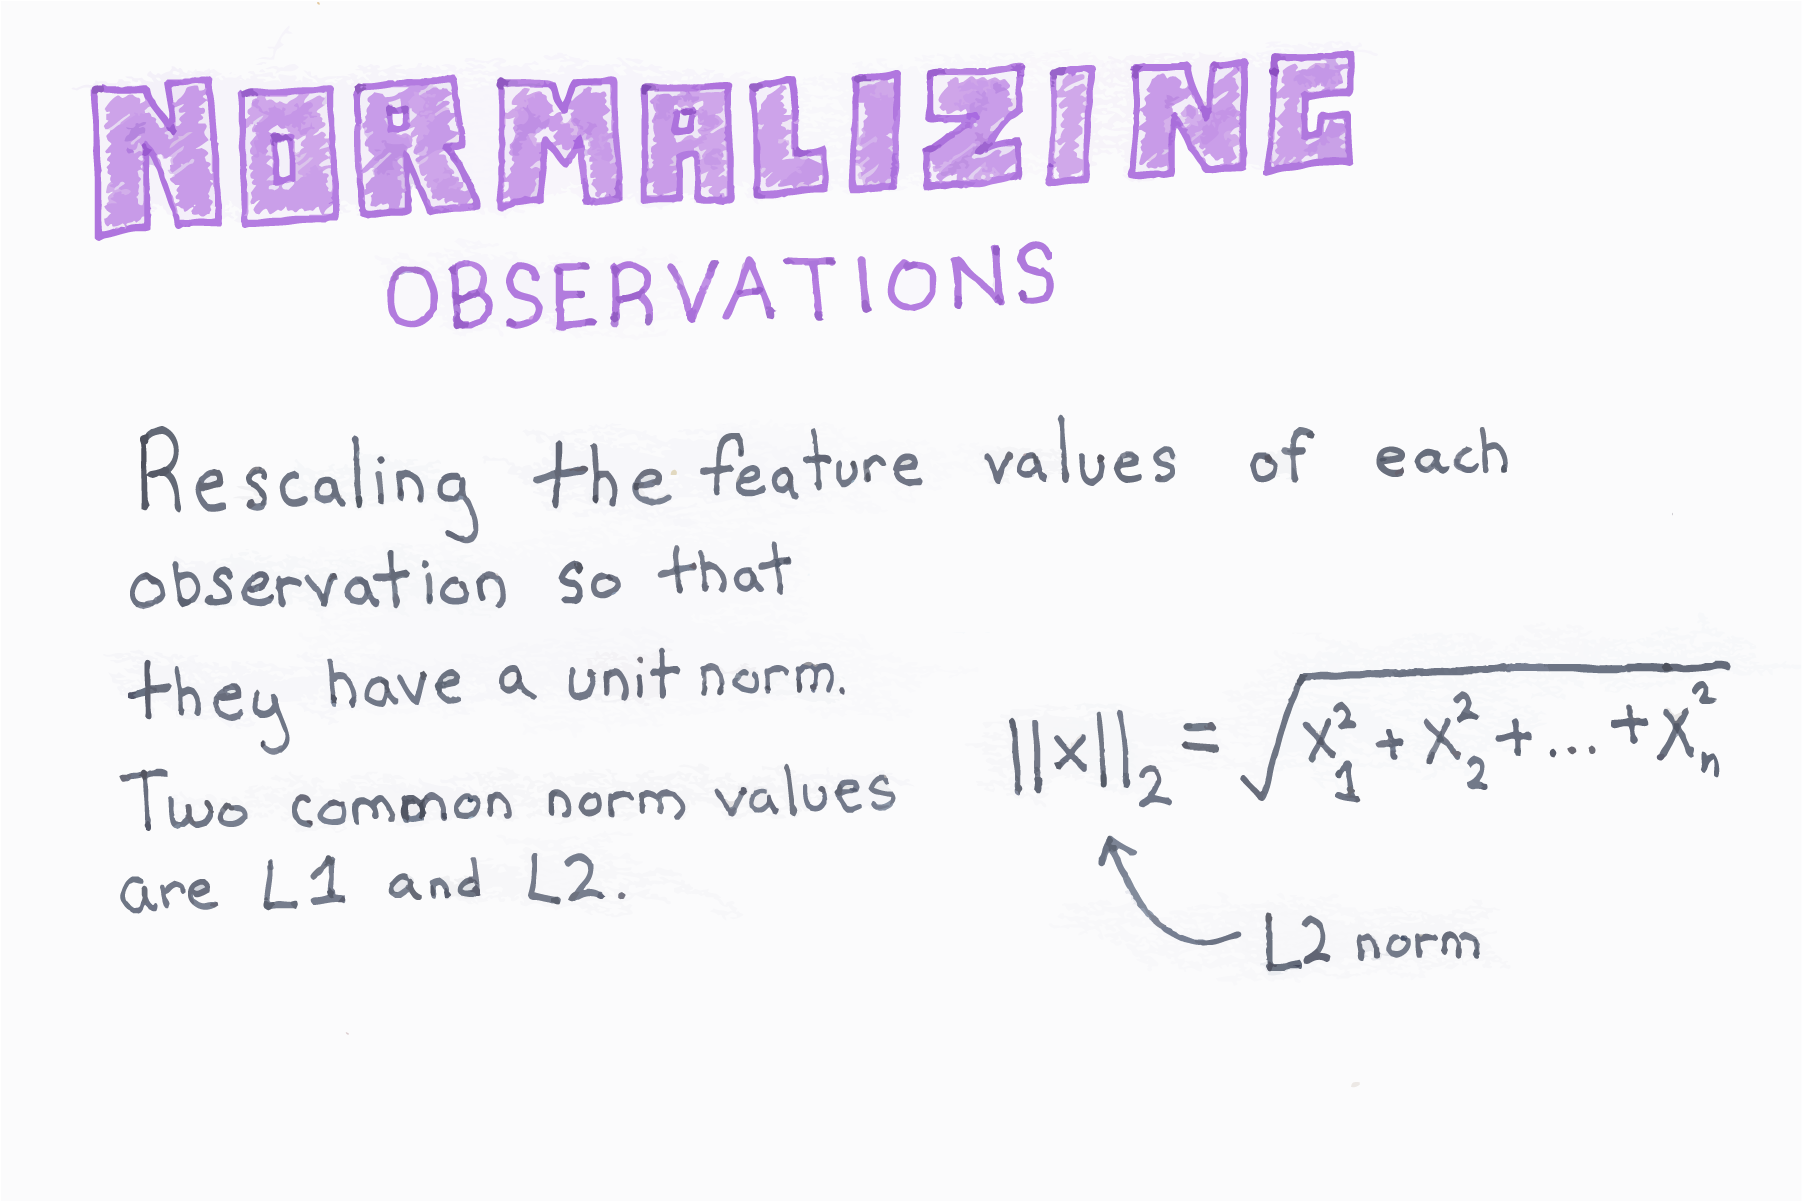

In [10]:
# Load libraries
from sklearn.preprocessing import Normalizer
import numpy as np

In [11]:
# Create feature matrix
X = np.array([[0.5, 0.5], 
              [1.1, 3.4], 
              [1.5, 20.2], 
              [1.63, 34.4], 
              [10.9, 3.3]])

# Normalize Observations
Normalizer rescales the values on individual observations to have unit norm (the sum of their lengths is one).

In [12]:
# create Normalizer
normalizer = Normalizer(norm="l2")
# Transform feature matrix
normalizer.transform(X)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

# 4) One-Hot Encode Features With Multiple Labels

In [13]:
# Load libraries
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

In [14]:
# Create NumPy array
y = [('Texas', 'Florida'), 
    ('California', 'Alabama'), 
    ('Texas', 'Florida'), 
    ('Delware', 'Florida'), 
    ('Texas', 'Alabama')]

In [15]:
# Create a MultiLabelBinarizer 
one_hot = MultiLabelBinarizer()
# One-hot encode data
one_hot.fit_transform(y)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [16]:
# View Classes
one_hot.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

# 5) One-Hot Encode Nominal Categorical Features

In [17]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Create NumPy array
x = np.array([['Texas'], 
              ['California'], 
              ['Texas'], 
              ['Delaware'], 
              ['Texas']])

In [19]:
# Create LabelBinzarizer object
one_hot = OneHotEncoder()
# One-hot encode data
one_hot.fit_transform(x)

<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [20]:
# View classes
one_hot.categories_

[array(['California', 'Delaware', 'Texas'], dtype='<U10')]

In [21]:
# Dummy features
pd.get_dummies(x[:,0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


# 6) Preprocessing Categorical Features

Often, machine learning methods (e.g. logistic regression, SVM with a linear kernel, etc) will require that categorical variables be converted into dummy variables (also called OneHot encoding). For example, a single feature Fruit would be converted into three features, Apples, Oranges, and Bananas, one for each category in the categorical feature.

There are common ways to preprocess categorical features: using pandas or scikit-learn.

In [22]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import pandas as pd

In [23]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])
df

,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


In [24]:
# Create dummy variables for every unique category in df.city
pd.get_dummies(df["city"])

,Baltimore,Boston,Douglas,Miami,San Francisco
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,1,0,0,0


In [25]:
# Convert Nominal Categorical Data Into Dummy (OneHot) Features Using Scikit
# Convert strings categorical names to integers
integerized_data = preprocessing.LabelEncoder().fit_transform(df['city'])
# View data
integerized_data

array([4, 0, 3, 2, 1])

In [26]:
# # Convert integer categorical representations to OneHot encodings
preprocessing.OneHotEncoder().fit_transform(integerized_data.reshape(-1,1)).toarray()

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 7 ) Rescale A Feature

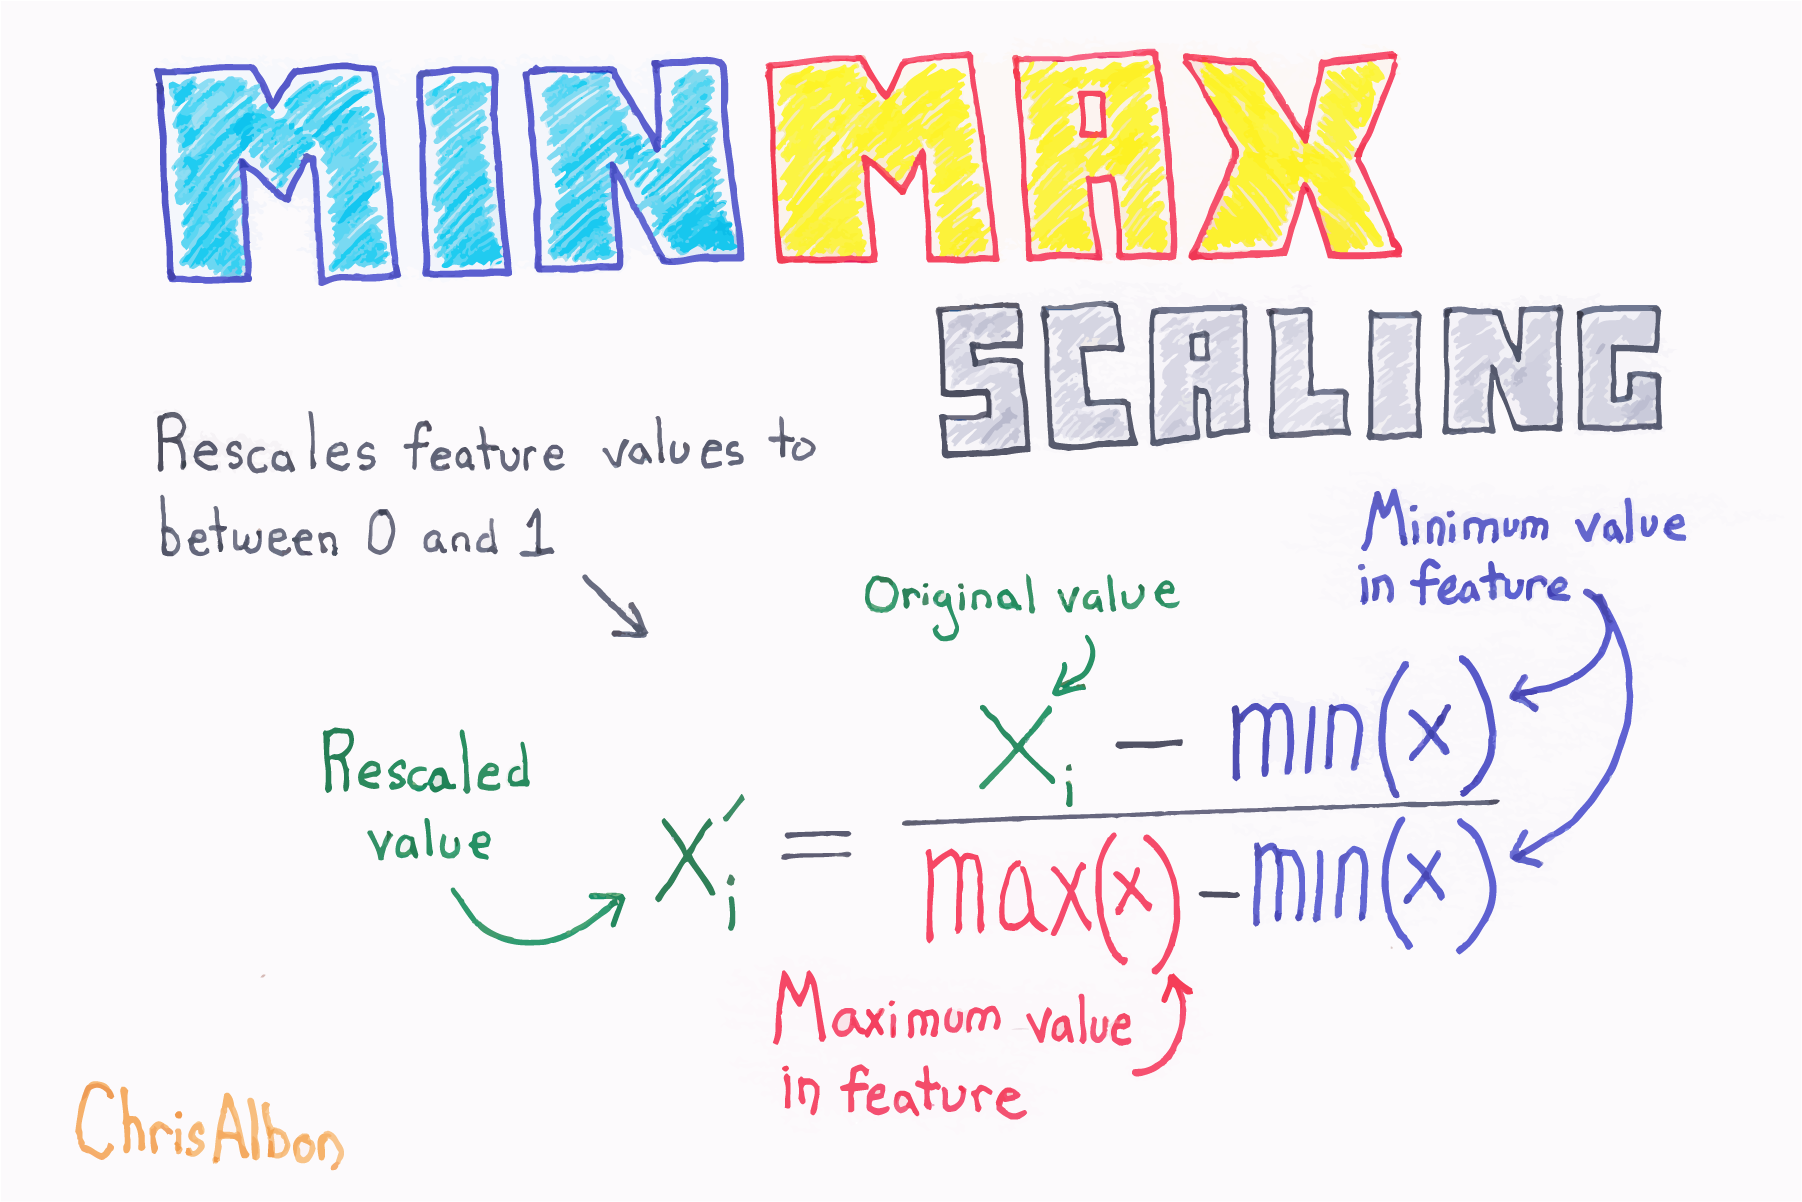

In [27]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [28]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [29]:
# Rescale Feature Using 
# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
x_scale = minmax_scale.fit_transform(x)

# Show feature
x_scale

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

# 8) Standardize A Feature

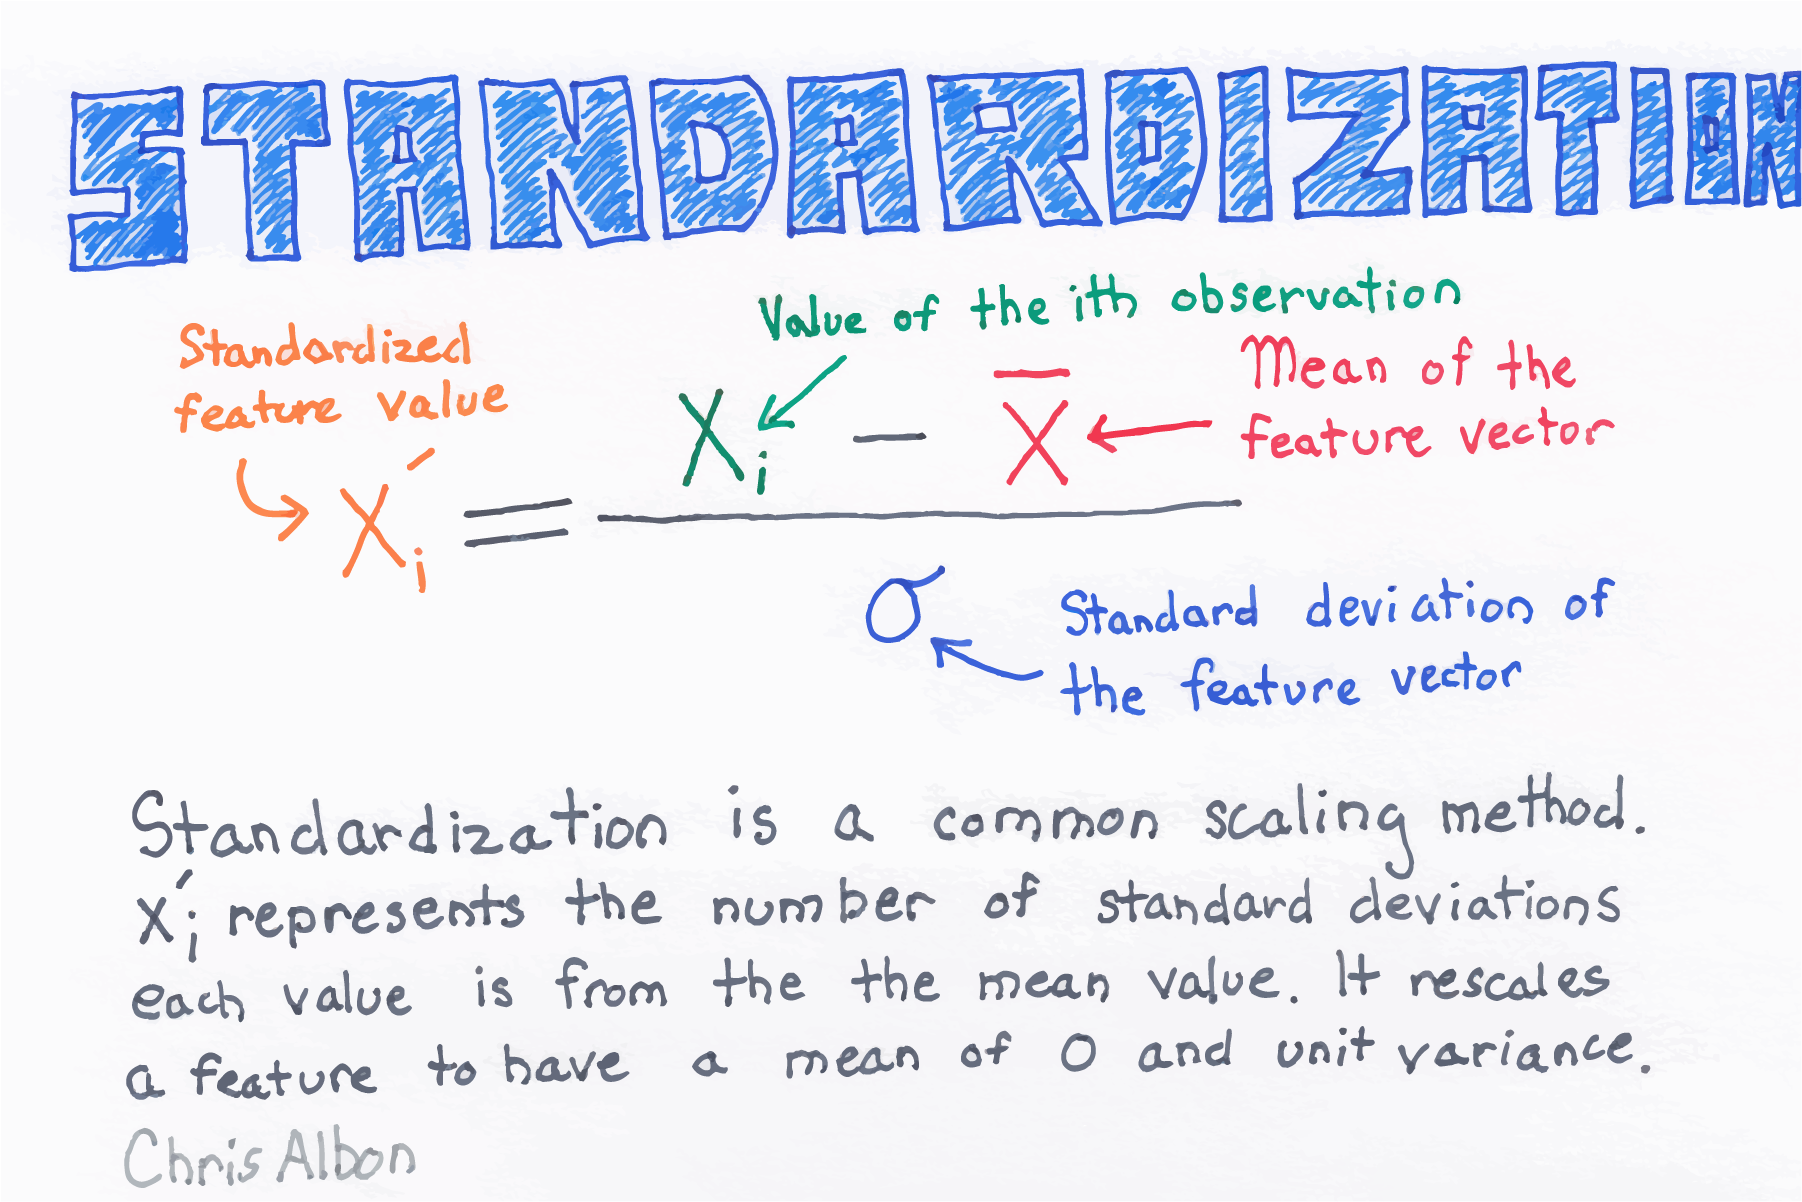

In [30]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [31]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [32]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(x)

# Show feature
standardized

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])